## 4.9 Data visualizations
### This script contains the following points:

#### 1. Import data and libraries
#### 2. Bar charts
#### 3. Exporting charts
#### 4. Histograms and Scatterplots
#### 5. Creating line charts

#### 1. Import data and libraries

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from matplotlib.ticker import ScalarFormatter, FuncFormatter

In [2]:
path = r"03-11-23 Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_standard.pkl'))

In [4]:
# Consistency checks
df.shape

(32404859, 23)

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_orders,freq_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Frequent customer


#### 2. Bar charts

<Axes: xlabel='order_day_of_week'>

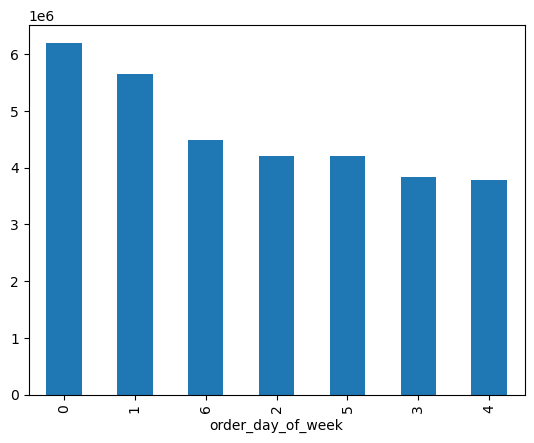

In [6]:
# Create a bar chart
df['order_day_of_week'].value_counts().plot.bar()



<Axes: xlabel='order_day_of_week'>

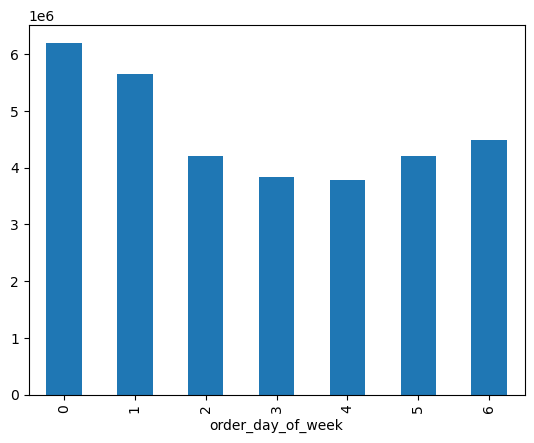

In [7]:
# Sorts the bars in your chart according to their index order (rather than largest to smallest)
df['order_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# Same trick can be used when printing frequencies
df['order_day_of_week'].value_counts()

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [9]:
df['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='order_day_of_week'>

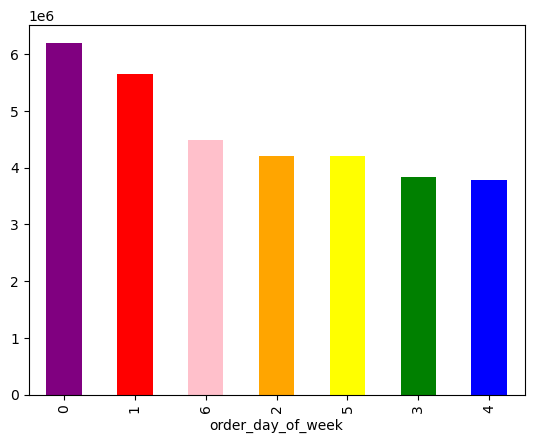

In [10]:
# Bar chart using colors argument
df['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### 3. Exporting charts

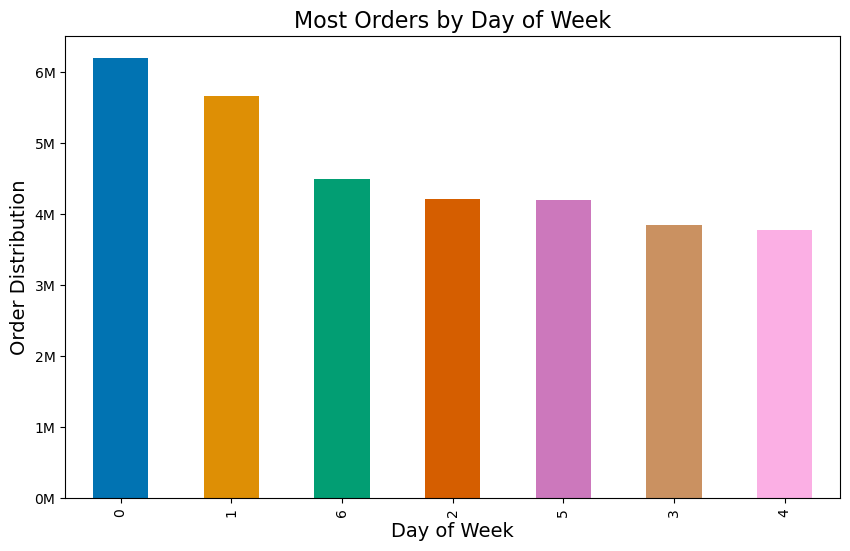

In [14]:
# Create a bar chart of the “order_day_of_week” column


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Save bar chart
bar = df['order_day_of_week'].value_counts().plot.bar(color=colors)

# Add titles and labels
plt.title('Most Orders by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Order Distribution', fontsize=14)

# Format y-axis labels as floats with one decimal place
bar.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Show the plot
#plt.tight_layout()
           
plt.show()

In [15]:
# Export bar chart after saving
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 4. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

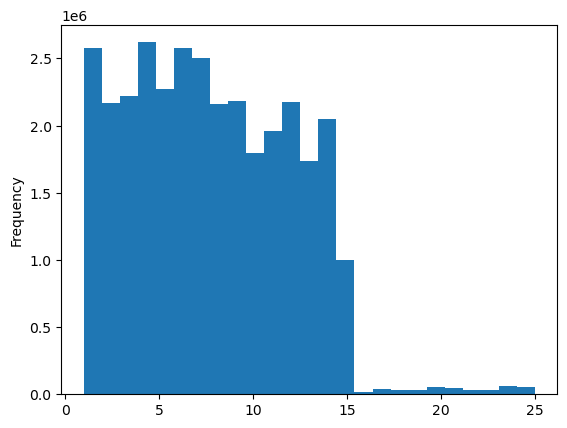

In [13]:
# Create a histogram of the “prices” column
df['prices'].plot.hist(bins = 25)

In [14]:
# Re-run consistency checks in "prices"
df['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [15]:
df['prices'].mean()

7.790994092173371

In [16]:
df['prices'].median()

7.4

In [17]:
df['prices'].max()

25.0

In [18]:
df['prices']

0            9.0
1            9.0
2            9.0
3            9.0
4            9.0
            ... 
32404854     3.7
32404855     3.7
32404856     6.9
32404857     6.9
32404858    10.3
Name: prices, Length: 32404859, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

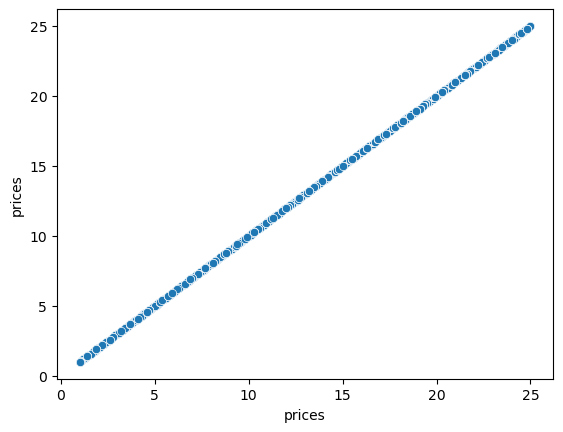

In [19]:
# Try plotting the “prices” column against itself, revealing any outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [20]:
# Anything above the “normal” price of a supermarket item $100
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_orders,freq_flag


In [21]:
# Mark overpriced items as missing Nans
df.loc[df['prices'] >100, 'prices'] = np.nan

In [22]:
# Run a max-value check on your “prices” column
df['prices'].max()

25.0

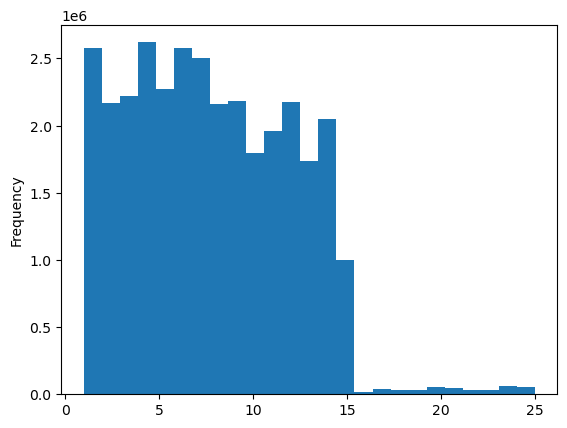

In [23]:
# Retry the histogram of your “prices” column
hist = df['prices'].plot.hist(bins = 25)

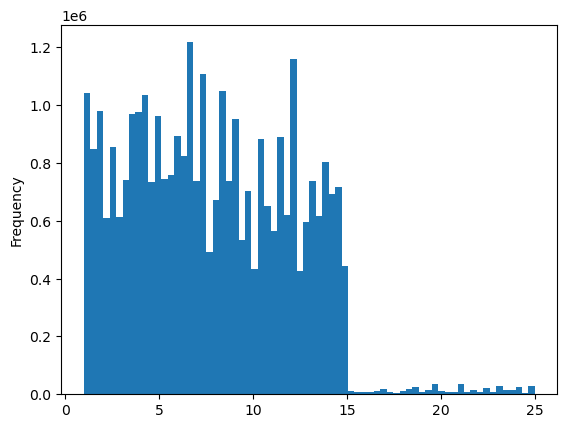

In [17]:
# Retry the histogram of your “prices” column
hist_2 = df['prices'].plot.hist(bins = 70)

In [25]:
# Export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_over_100.png'))

#### 5. Creating line charts

In [26]:
# Set the seed
# Create a list of holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [29]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [30]:
# Total row length
len(df)

32404859

In [31]:
# Adding the rows of both samples together
len(big) + len(small)

32404859

In [32]:
# Reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week”
df_2 = small[['order_day_of_week','prices']]

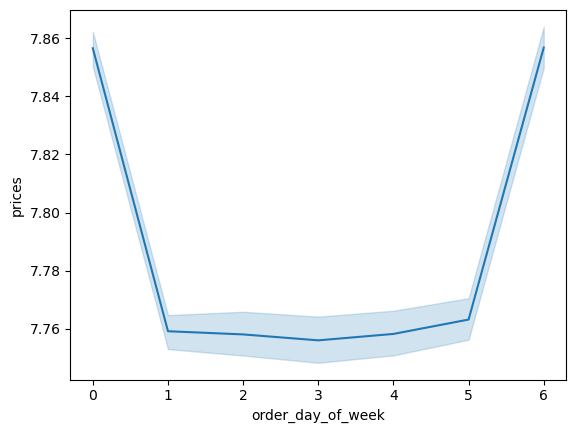

In [33]:
# Create line chart from sample
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [34]:
# Export small sample line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_orders_line_small.png'))